<a href="https://colab.research.google.com/github/imkrishsub/CTHCI_StatisticsBootcamp/blob/master/CTHCI_SoSe_2020_%7C_Statistics_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Purpose of this bootcamp

Hello everyone! In this bootcamp, you will get some practice performing standard statistical analysis tasks. It is meant to be your first shallow dive into statistical analysis so that when you have to do statistical analysis later on, you don't feel anxious and you can use this experience as a starting point.

# 2. Dataset

For this bootcamp, you will be using the [pills dataset](https://raw.githubusercontent.com/imkrishsub/CTHCI_StatsWorkshop/master/pills.csv). The dataset consists of made up data from an experiment where three groups of participants were given different pills (red, green, and blue) to aid in weight loss. The measurements were made after an exposure to pills for one month. The columns include:

*   **participantID:** A unique ID used to identify the participant
*   **participantGender:** The gender of the participant; can be "M" for male or "F" for female
*   **pillType**: The type of pill taken by the participant; can be "Red", "Green" or "Blue"
*   **fatLoss**: The amount of body fat lost by the participant (measured in percentage)
*   **weightLoss**: The amount of weight lost by the participant (measured in kilograms)
*   **rating**: Subjective rating of how good the experience was for each participant (on a scale of 1 to 5, 5 being the best experience)



# 3. Tasks

## Your tasks are the investigate the following research questions:

1.   Do male participants lose more weight than female participants? Is this statistically significant? Is this practically significant?
2.   Which pill results in more weight loss? 
3.   Which pill results in more fat loss?
4.   (Optional) What is the effect of each pill on the subjective rating of the participants?

## To validate a hypothesis, follow these steps:

1.   Load the data and subset the data accordingly to select the appropriate distributions
2.   Visualize the different distributions as histograms to see if the distributions are normally distributed or skewed
3.   Plot the distributions in a boxplot to see if there could be a difference between the distributions 
4.   Compute summary statistics, e.g., mean and sd, for each distribution 
5.   Check the assumptions of the significance test. Usually, this means checking for the following:
  *   Are all the distributions normally distributed? 
  *   (For between-subjects design) Are the variances of the distributions roughly the same? 
  *   (For within-subjects design) Sphericity
  *   Note: Each significance test will have its own assumptions. Please do not consider the above list to be exhaustive. 
6.   Select and perform the appropriate statistical test, using e.g., [slide #23 from yesterday's lecture](https://github.com/imkrishsub/CTHCI_StatsWorkshop/blob/master/Selecting%20the%20right%20test.001.jpeg) or https://yatani.jp/teaching/doku.php?id=hcistats:start#what_statistical_test_should_i_use (this link also contains some sample code). 
7.   (Optional) If the independent variable has three or more levels and if you find a significant effect from the significance test, you need to do post-hoc tests. This is because the significance test will only tell you if there is a significant effect of the independent variable, but not whether a particular level has a significant effect on the dependent variable over another level. The simplest way to do this for distributions that are normally distributed and have similar variances is to use Tukey's HSD test. 
8.   Interpret the results and write one-two sentences to report the findings. E.g.:
"The input method (fingers, stylus) had a significant effect on the task completion time, t(20) = 4.03, p < .001. 
Finger (M = 42.03 s; SD = 10.5) is faster than Stylus (M = 76.21 s; SD = 12.3). Difference between the means is 34.18 s."




# 4. Sample code

Given below is some sample code in R. If you are familiar with Python, feel free to use that. Check out [this notebook](https://colab.research.google.com/drive/10-QLoDndx-YJBlQY7Pzh2I0mFbDGoyNy) for some analysis code with Python.

       X              bookID           genre       buyerAge     buyerGender 
 Min.   :  1.00   1      :  1   Action    :40   Min.   :12.00   Female:168  
 1st Qu.: 70.75   2      :  1   Biography :40   1st Qu.:24.00   Male  :112  
 Median :140.50   3      :  1   Comics    :40   Median :39.00               
 Mean   :140.50   4      :  1   Fantasy   :40   Mean   :38.44               
 3rd Qu.:210.25   5      :  1   Horror    :40   3rd Qu.:52.00               
 Max.   :280.00   6      :  1   NonFiction:40   Max.   :65.00               
                  (Other):274   Romance   :40                               
   copiesSold        nPages     
 Min.   :   27   Min.   :  5.0  
 1st Qu.: 3375   1st Qu.:127.8  
 Median : 4966   Median :211.0  
 Mean   : 4955   Mean   :219.3  
 3rd Qu.: 6442   3rd Qu.:298.2  
 Max.   :12885   Max.   :600.0  
                                

genre,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Action,730,3803.00,4509.5,5062.200,5868.75,12885
Biography,2039,3491.50,5169.0,5429.550,7178.50,9601
Comics,56,3004.50,4406.0,4542.450,6365.25,10857
Fantasy,455,2795.50,4687.0,4704.875,6005.00,10627
Horror,547,3228.25,5159.5,4751.750,5800.75,7706
NonFiction,27,3230.25,5546.5,5304.800,7002.50,10849
Romance,305,3063.00,4881.5,4887.075,6498.75,9194


genre,copiesSold.mean,copiesSold.sd
<fct>,<dbl>,<dbl>
Action,5062.200,2292.461
Biography,5429.550,2179.713
Comics,4542.450,2254.018
Fantasy,4704.875,2411.913
Horror,4751.750,1879.280
NonFiction,5304.800,2682.832
Romance,4887.075,2085.806


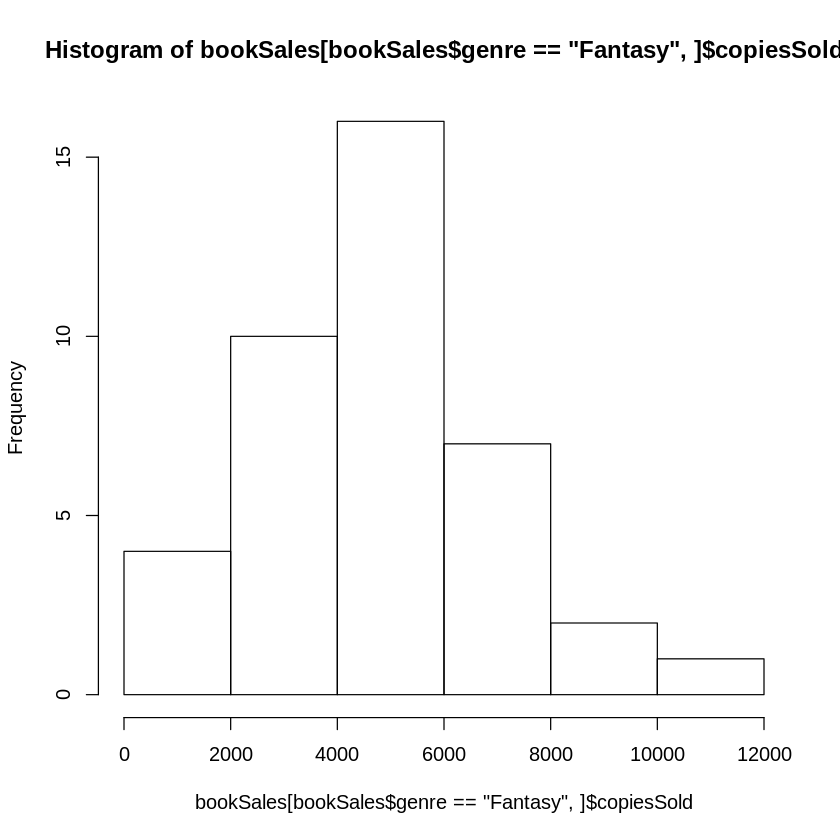

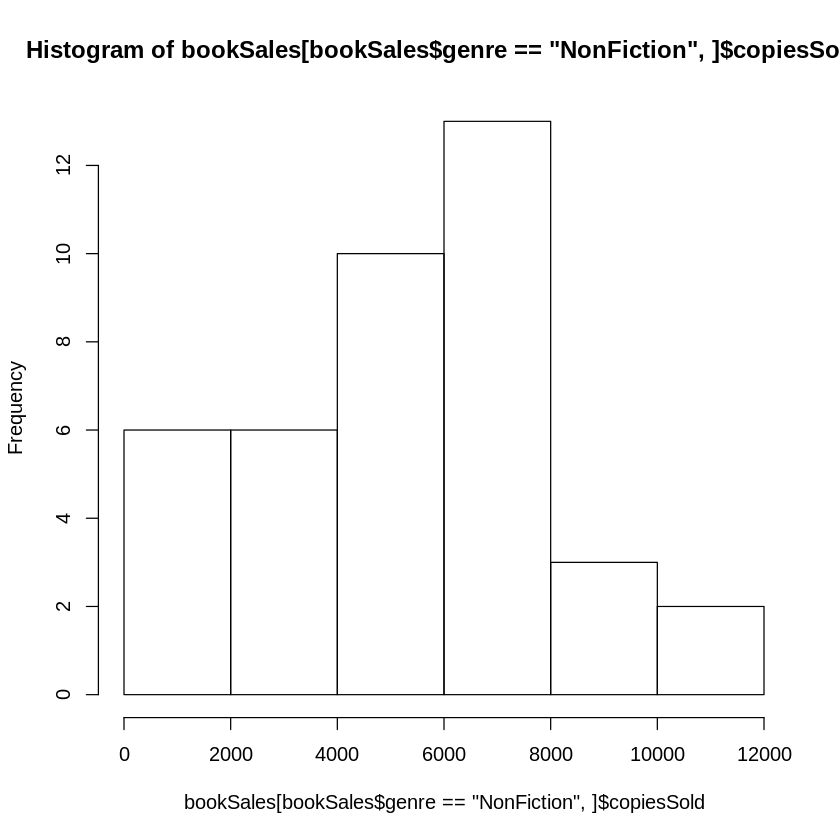

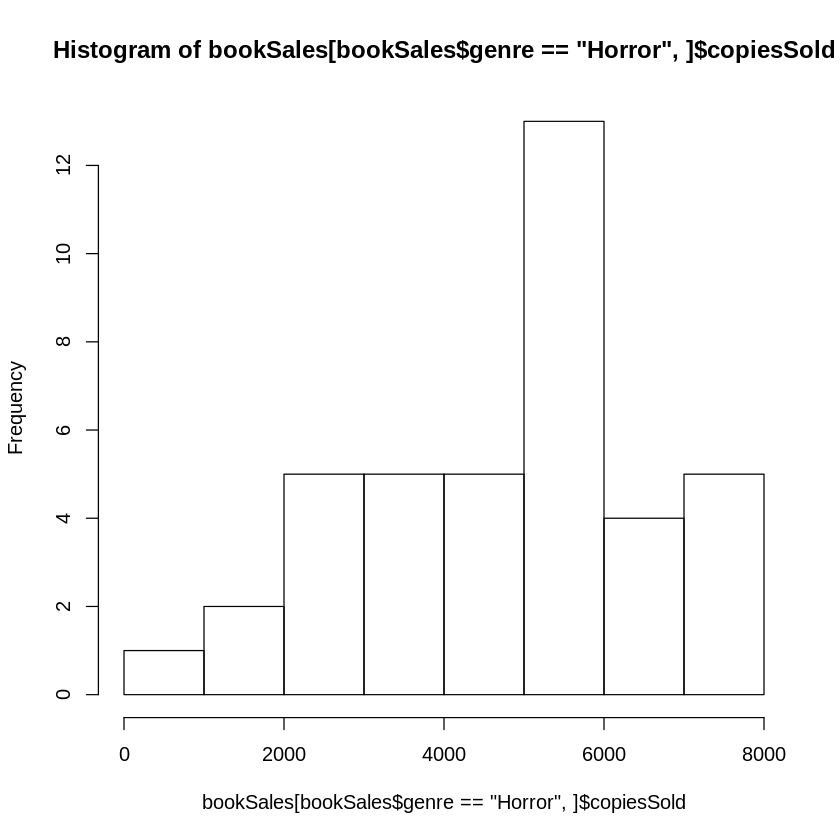

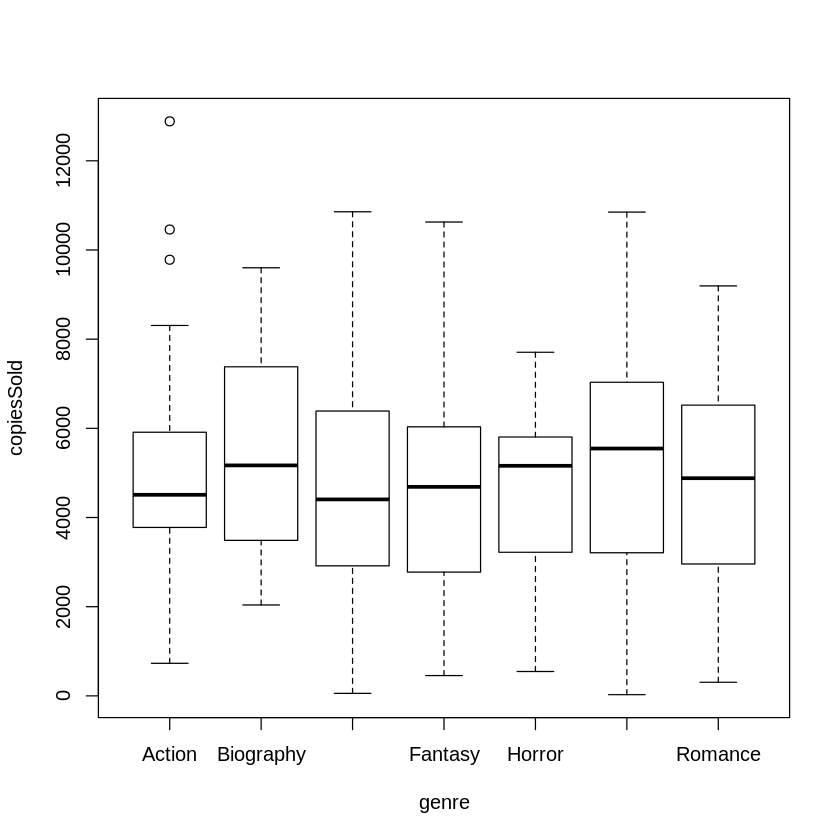

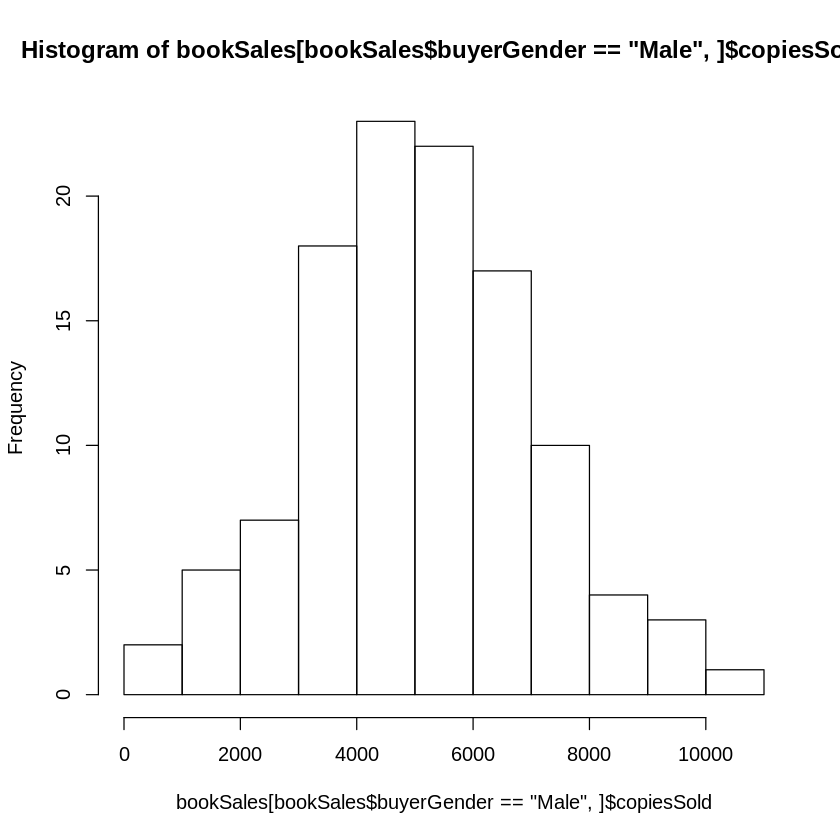

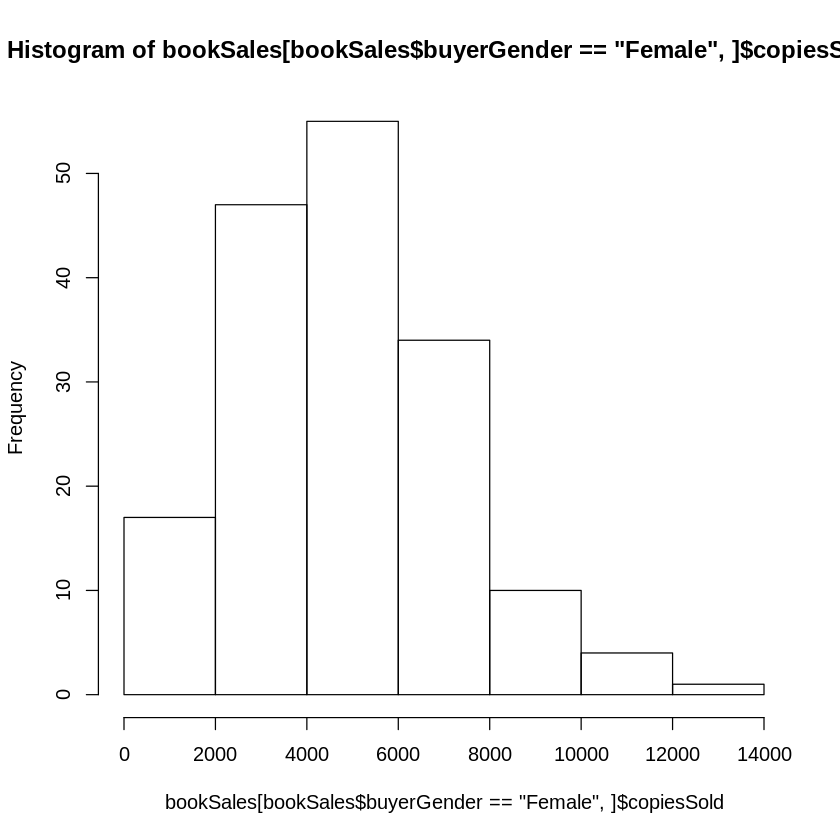


	Shapiro-Wilk normality test

data:  bookSales[bookSales$genre == "Fantasy", ]$copiesSold
W = 0.97662, p-value = 0.566



	Shapiro-Wilk normality test

data:  bookSales[bookSales$genre == "NonFiction", ]$copiesSold
W = 0.97692, p-value = 0.5767



	Shapiro-Wilk normality test

data:  bookSales[bookSales$genre == "Horror", ]$copiesSold
W = 0.96122, p-value = 0.1844


ERROR: ignored

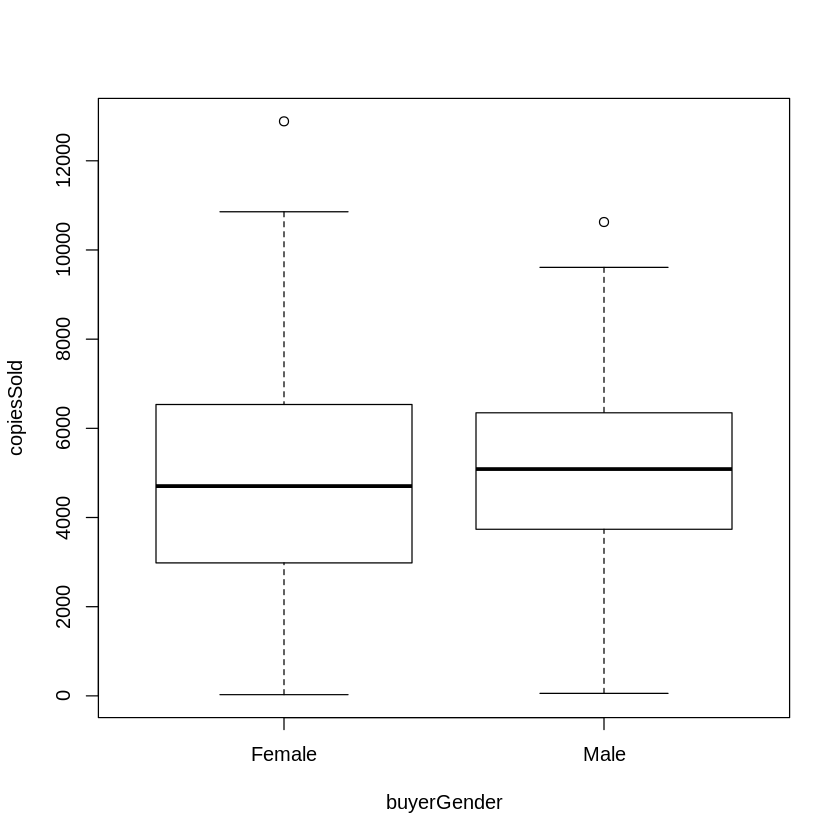

In [0]:
# Read in data
library(RCurl)
filePtr <- getURL("https://raw.githubusercontent.com/imkrishsub/CTHCI_StatsWorkshop/master/bookSales.csv?accessType=DOWNLOAD")
bookSales <- read.csv(text = filePtr)
bookSales$bookID <- factor(bookSales$bookID)
summary(bookSales)

# View descriptive statistics (copiesSold)
library(plyr)
ddply(bookSales, ~ genre, function(data) summary(data$copiesSold))
ddply(bookSales, ~ genre, summarise, copiesSold.mean=mean(copiesSold), copiesSold.sd=sd(copiesSold))

# Plot copiesSold for various genres
hist(bookSales[bookSales$genre == "Fantasy",]$copiesSold)
hist(bookSales[bookSales$genre == "NonFiction",]$copiesSold)
hist(bookSales[bookSales$genre == "Horror",]$copiesSold)
plot(copiesSold ~ genre, data=bookSales) # boxplot

# Plot copiesSold for various buyer gender
hist(bookSales[bookSales$buyerGender == "Male",]$copiesSold)
hist(bookSales[bookSales$buyerGender == "Female",]$copiesSold)
plot(copiesSold ~ buyerGender, data=bookSales) # boxplot

# Test normality for book genre
shapiro.test(bookSales[bookSales$genre == "Fantasy",]$copiesSold)
shapiro.test(bookSales[bookSales$genre == "NonFiction",]$copiesSold)
shapiro.test(bookSales[bookSales$genre == "Horror",]$copiesSold)

# Test if variances are similar
library(car)
leveneTest(copiesSold ~ genre, data=bookSales, center=median) # Brown-Forsythe test

# Do ANOVA
m = aov(copiesSold ~ genre, data=bookSales)
print(m)
anova(m)

# Test normality for buyer's gender
shapiro.test(bookSales[bookSales$buyerGender == "Male",]$copiesSold)
shapiro.test(bookSales[bookSales$buyerGender == "Female",]$copiesSold)

# Test if variances are similar
leveneTest(copiesSold ~ buyerGender, data=bookSales, center=median) # Brown-Forsythe test

# Test failed, do Wilcoxon signed-rank test
wilcoxResults <- wilcox.test(copiesSold ~ buyerGender, data = bookSales, exact = FALSE)


# 5. How to write code in R?

You have two options:

1.   Use a Google Colab Notebook like this one (creating notebooks requires a Google account). To create your Google Colab Notebook, click [here.](https://colab.research.google.com/notebook#create=true&language=r). You can then copy-paste code from this file to get started. 
2.   Install RStudio on computer (free software, available for all platforms). Download RStudio [here.](https://rstudio.com/products/rstudio/download/)

There are a couple of things to keep in mind. Before using any library, you need to install it. This is done in the same way in both RStudio and Colab Notebooks:


In [0]:
install.packages("RCurl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



To use dataset files from the web on Colab Notebooks, use the following code:

In [0]:
library(RCurl)
filePtr <- getURL("https://raw.githubusercontent.com/imkrishsub/CTHCI_StatsWorkshop/master/pills.csv?accessType=DOWNLOAD")
pills <- read.csv(text = filePtr, sep = ";")
pills

X,participantID,participantGender,pillType,muscleLoss,weightLoss,rating
<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<int>
1,1,F,Blue,5.89604975,6.4767621,1
2,2,F,Red,0.72938038,0.7110958,3
3,3,M,Red,0.45311265,0.2452057,1
4,4,F,Blue,0.79570898,2.4268847,3
5,5,F,Red,0.93123622,1.0939671,4
6,6,F,Red,0.05876324,-1.9294562,5
7,7,M,Red,0.44588093,0.2009241,4
8,8,F,Blue,0.18325629,0.8106748,3
9,9,F,Green,0.99239912,2.3993809,1
